# Sistemas Inteligentes

## Laboratório 3 - Redução de Dimensionalidade e Regressão

Algoritmos de Redução de dimensionalidade:
- Principal Component Analysis (PCA)
- Independent Component Analysis (ICA)
- Isometric Mapping (Isomap)
- T-Distributed Stochastic Neighbor Embedding (TSNE)

Modelos de regressão linear:
- Least Squares
- Ridge
- Lasso
- Lasso Least-angle regression (LARS)
- RANdom SAmple Consensus (RANSAC)
- Theil-Sen

### Identificação do Aluno

#### Nome Completo

Gabriel Murakami Alves

#### RA

11071916

Importe o dataset de pacientes diabéticos da biblioteca Scikit (load_diabetes) e separe os dados entre atributos (X) e saídas (y).

In [0]:
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split

diabetes_dataset = ds.load_diabetes()
diabetes_target = diabetes_dataset.target
diabetes_data = diabetes_dataset.data

Mostre os formatos da variável de atributos e da variável de saídas.

In [314]:
diabetes_data.shape

(442, 10)

In [315]:
diabetes_target.shape

(442,)

## Redução de Dimensionalidade

Importe e aplique as funções de redução de dimensionalidade (PCA, FastICA, Isomap e TSNE) para reduzir a dimensionalidade a apenas uma feature.

In [0]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap, TSNE

Mostre o formato da nova variável de atributos após a redução de dimensionalidade para cada algoritmo.

In [317]:
pca = PCA(n_components=1)
diabetes_data_transformed_pca = pca.fit_transform(diabetes_data)
diabetes_data_transformed_pca.shape

(442, 1)

In [318]:
fastica = FastICA(n_components=1)
diabetes_data_transformed_ica = fastica.fit_transform(diabetes_data)
diabetes_data_transformed_ica.shape

(442, 1)

In [319]:
isomap = Isomap(n_components=1)
diabetes_data_transformed_iso = isomap.fit_transform(diabetes_data)
diabetes_data_transformed_iso.shape

(442, 1)

In [320]:
tsne = TSNE(n_components=1)
diabetes_data_embedded_tsne = tsne.fit_transform(diabetes_data)
diabetes_data_embedded_tsne.shape

(442, 1)

### Caso mais simples

Faça a separação dos dados para treinamento e teste. Reserve 20% dos dados para teste.

In [0]:
x_train, x_test, y_train, y_test = train_test_split(diabetes_data_transformed_pca, diabetes_target, test_size=0.20)

Importe o regressor linear e utilize-o para gerar um modelo, então faça uma regressão com os dados de teste.

In [0]:
from sklearn import linear_model
import matplotlib.pyplot as plt

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)


Importe as funções de erro quadrático médio (MSE) e o coeficiente de determinação (R²), então imprima o MSE e o R².

In [323]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE: " + str(mean_squared_error(y_test, y_pred)))
print("R2: " + str(r2_score(y_test, y_pred)))

MSE: 3644.462837233723
R2: 0.3760395155282017


Então exiba o gráfico de dispersão dos dados de teste e a curva de regressão gerada.

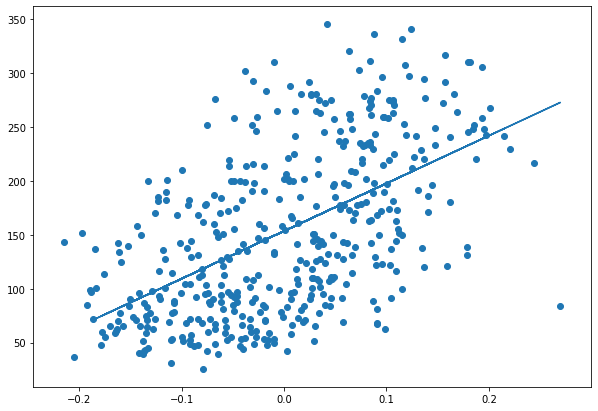

In [324]:
plt.scatter(diabetes_data_transformed_pca, diabetes_target)
plt.plot(x_test, y_pred)

### Comparando Métodos de Redução de Dimensionalidade

Agora, a fim de comparar com outras técnicas, crie um método iterativo que realize as etapas de separação dos dados entre treinamento e teste, gere um modelo de regressão linear, faça a predição com base nos dados de testes e calcule o erro quadrático médio e o coeficiente de determinação para cada iteração. Então, calcule os valores mínimo, médio, máximo e desvio padrão para cada uma dessas duas métricas. Por fim, plote os histogramas (com 100 bins) das duas métricas. Use 10000 (dez mil) iterações.

#### PCA

In [325]:
import numpy as np

v_mse_pca = []
v_r2_pca = []
for i in range(0, 10000):
  x_train, x_test, y_train, y_test = train_test_split(diabetes_data_transformed_pca, diabetes_target, test_size=0.20)
  reg = linear_model.LinearRegression()
  reg.fit(x_train, y_train)
  y_pred_pca = reg.predict(x_test)
  v_mse_pca.append(mean_squared_error(y_test, y_pred_pca))
  v_r2_pca.append(r2_score(y_test, y_pred_pca))

print("Max MSE PCA: " + str(max(v_mse_pca)))
print("Min MSE PCA: " + str(min(v_mse_pca)))
print("DevPad MSE PCA: " + str(np.sqrt(np.var(v_mse_pca))))
print("Max R2 PCA: " + str(max(v_r2_pca)))
print("Min R2 PCA: " + str(min(v_r2_pca)))
print("DevPad R2 PCA: " + str(np.sqrt(np.var(v_r2_pca))))



Max MSE PCA: 6748.032512813571
Min MSE PCA: 2596.365808642253
DevPad MSE PCA: 474.2994292375573
Max R2 PCA: 0.49454361810218717
Min R2 PCA: -0.1444225357014497
DevPad R2 PCA: 0.07209814661217993


(array([  2.,   1.,   1.,   1.,   3.,   4.,   1.,  12.,   7.,  10.,  14.,
         18.,  23.,  33.,  54.,  56.,  57.,  74.,  88., 120., 162., 164.,
        139., 178., 195., 237., 254., 245., 275., 274., 270., 351., 340.,
        334., 355., 365., 356., 355., 310., 336., 320., 289., 318., 263.,
        285., 224., 221., 224., 218., 204., 168., 167., 142., 119., 117.,
         84.,  74.,  87.,  62.,  60.,  56.,  40.,  39.,  22.,  18.,  14.,
         19.,  16.,  16.,   8.,   8.,   5.,   3.,   3.,   5.,   0.,   1.,
          2.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([2596.36580864, 2637.88247568, 2679.39914273, 2720.91580977,
        2762.43247681, 2803.94914385, 2845.46581089, 2886.98247793,
        2928.49914498, 2970.01581202, 3011.53247906, 3053.0491461 ,
        3094.56581314, 3136.08248018, 3177.59914723, 3219.11581427,
        3260.63248131, 3302.14914835, 3343.665

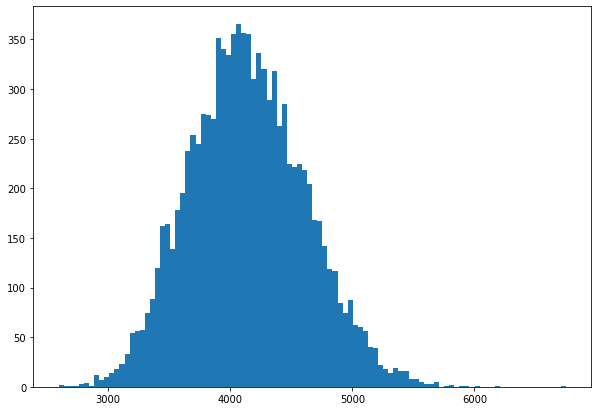

In [326]:
plt.hist(v_mse_pca, bins=100)

(array([  1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,   1.,   2.,   0.,
          0.,   0.,   4.,   0.,   4.,   1.,   6.,   1.,   5.,   1.,   5.,
          9.,  10.,   8.,   8.,  19.,  19.,  28.,  26.,  20.,  39.,  39.,
         48.,  49.,  46.,  61.,  73.,  89., 101., 107., 115., 115., 140.,
        148., 188., 158., 184., 196., 236., 247., 265., 318., 333., 323.,
        348., 335., 391., 394., 339., 361., 369., 357., 355., 335., 311.,
        305., 281., 263., 222., 214., 160., 167., 155., 118., 106.,  85.,
         62.,  40.,  43.,  24.,  15.,  15.,  11.,   6.,   1.,   4.,   3.,
          3.]),
 array([-0.14442254, -0.13803287, -0.13164321, -0.12525355, -0.11886389,
        -0.11247423, -0.10608457, -0.0996949 , -0.09330524, -0.08691558,
        -0.08052592, -0.07413626, -0.0677466 , -0.06135694, -0.05496727,
        -0.04857761, -0.04218795, -0.03579829, -0.02940863, -0.02301897,
        -0.0166293 , -0.01

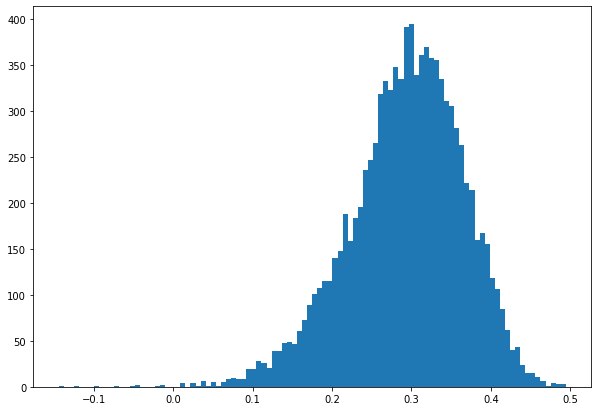

In [327]:
plt.hist(v_r2_pca, bins=100)

#### ICA

In [328]:
v_mse_ica = []
v_r2_ica = []
for i in range(0, 10000):
  x_train, x_test, y_train, y_test = train_test_split(diabetes_data_transformed_ica, diabetes_target, test_size=0.20)
  reg = linear_model.LinearRegression()
  reg.fit(x_train, y_train)
  y_pred_ica = reg.predict(x_test)
  v_mse_ica.append(mean_squared_error(y_test, y_pred_ica))
  v_r2_ica.append(r2_score(y_test, y_pred_ica))

print("Max MSE ica: " + str(max(v_mse_ica)))
print("Min MSE ica: " + str(min(v_mse_ica)))
print("DevPad MSE ica: " + str(np.sqrt(np.var(v_mse_ica))))
print("Max R2 ica: " + str(max(v_r2_ica)))
print("Min R2 ica: " + str(min(v_r2_ica)))
print("DevPad R2 ica: " + str(np.sqrt(np.var(v_r2_ica))))

Max MSE ica: 6033.953597817857
Min MSE ica: 2716.4085947292965
DevPad MSE ica: 478.54387013228956
Max R2 ica: 0.523993175305098
Min R2 ica: -0.1086671925897933
DevPad R2 ica: 0.07143442311819898


(array([  3.,   3.,   0.,   5.,   5.,  10.,  11.,   6.,  11.,  16.,  15.,
         23.,  22.,  49.,  39.,  43.,  51.,  55.,  70.,  78.,  90.,  95.,
         90., 127., 119., 157., 145., 171., 167., 199., 209., 212., 228.,
        236., 224., 266., 250., 275., 260., 263., 283., 264., 263., 304.,
        275., 282., 242., 244., 227., 222., 212., 234., 229., 199., 189.,
        175., 162., 177., 156., 161., 128., 107., 104., 106.,  87.,  67.,
         68.,  67.,  72.,  43.,  52.,  43.,  46.,  36.,  20.,  22.,  20.,
         19.,  14.,   4.,  16.,   8.,   8.,   9.,   6.,   4.,   7.,   5.,
          4.,   5.,   0.,   1.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,
          1.]),
 array([2716.40859473, 2749.58404476, 2782.75949479, 2815.93494482,
        2849.11039485, 2882.28584488, 2915.46129491, 2948.63674495,
        2981.81219498, 3014.98764501, 3048.16309504, 3081.33854507,
        3114.5139951 , 3147.68944513, 3180.86489516, 3214.04034519,
        3247.21579522, 3280.39124525, 3313.566

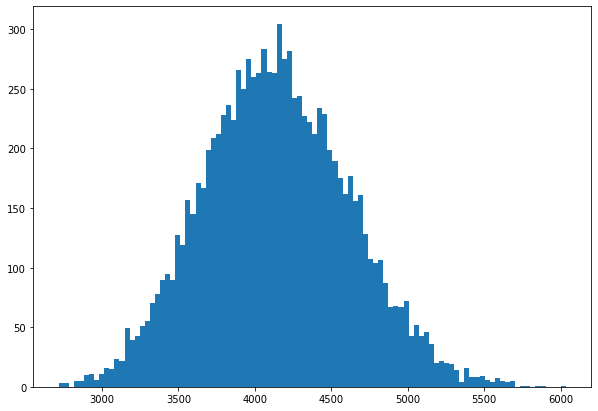

In [329]:
plt.hist(v_mse_ica, bins=100)

(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   1.,
          0.,   1.,   1.,   3.,   0.,   0.,   1.,   1.,   1.,   5.,   2.,
          1.,   5.,  10.,   4.,   6.,   7.,   8.,  10.,  15.,  20.,  17.,
         14.,  19.,  24.,  28.,  31.,  32.,  35.,  51.,  46.,  59.,  76.,
         92.,  80.,  91., 123., 118., 146., 149., 179., 178., 177., 223.,
        191., 297., 289., 279., 306., 316., 320., 348., 378., 354., 384.,
        385., 385., 395., 340., 336., 337., 290., 273., 267., 225., 231.,
        160., 172., 136., 119.,  92.,  82.,  56.,  36.,  32.,  29.,  18.,
         13.,  10.,  10.,   9.,   2.,   1.,   1.,   1.,   0.,   1.,   0.,
          1.]),
 array([-0.10866719, -0.10234059, -0.09601399, -0.08968738, -0.08336078,
        -0.07703417, -0.07070757, -0.06438097, -0.05805436, -0.05172776,
        -0.04540116, -0.03907455, -0.03274795, -0.02642134, -0.02009474,
        -0.01376814, -0.00744153, -0.00111493,  0.00521167,  0.01153828,
         0.01786488,  0.02

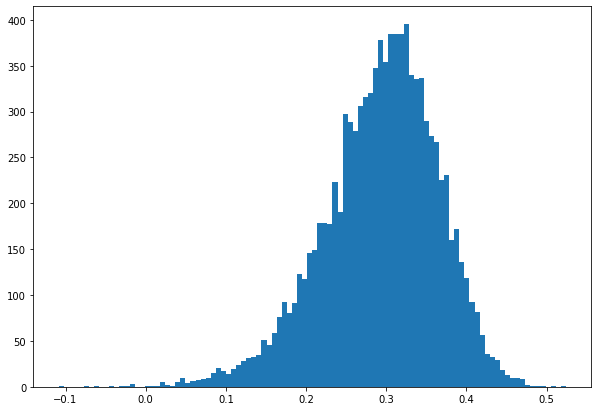

In [330]:
plt.hist(v_r2_ica, bins=100)

#### Isomap

In [331]:
v_mse_iso = []
v_r2_iso = []
for i in range(0, 10000):
  x_train, x_test, y_train, y_test = train_test_split(diabetes_data_transformed_iso, diabetes_target, test_size=0.20)
  reg = linear_model.LinearRegression()
  reg.fit(x_train, y_train)
  y_pred_iso = reg.predict(x_test)
  v_mse_iso.append(mean_squared_error(y_test, y_pred_iso))
  v_r2_iso.append(r2_score(y_test, y_pred_iso))

print("Max MSE iso: " + str(max(v_mse_iso)))
print("Min MSE iso: " + str(min(v_mse_iso)))
print("DevPad MSE iso: " + str(np.sqrt(np.var(v_mse_iso))))
print("Max R2 iso: " + str(max(v_r2_iso)))
print("Min R2 iso: " + str(min(v_r2_iso)))
print("DevPad R2 iso: " + str(np.sqrt(np.var(v_r2_iso))))

Max MSE iso: 7864.662516373269
Min MSE iso: 3604.2585059576563
DevPad MSE iso: 579.4360047487563
Max R2 iso: 0.1650426094819083
Min R2 iso: -0.26218089228694375
DevPad R2 iso: 0.04785156638437726


(array([  2.,   0.,   0.,   2.,   1.,   2.,   0.,   1.,   4.,   2.,   5.,
          5.,  12.,  10.,  13.,  22.,  19.,  18.,  30.,  36.,  43.,  48.,
         70.,  64.,  63.,  69., 110., 110., 121., 123., 152., 149., 187.,
        179., 196., 194., 208., 240., 234., 252., 260., 283., 293., 321.,
        297., 276., 301., 302., 299., 301., 264., 276., 260., 275., 227.,
        255., 207., 199., 190., 175., 171., 172., 147., 128., 126., 114.,
        120., 107.,  82.,  75.,  68.,  52.,  42.,  51.,  39.,  41.,  19.,
         34.,  24.,  28.,  17.,  11.,  10.,  13.,   3.,  11.,   8.,   9.,
          2.,   4.,   9.,   0.,   1.,   0.,   1.,   0.,   2.,   1.,   0.,
          1.]),
 array([3604.25850596, 3646.86254606, 3689.46658617, 3732.07062627,
        3774.67466637, 3817.27870648, 3859.88274658, 3902.48678669,
        3945.09082679, 3987.6948669 , 4030.298907  , 4072.9029471 ,
        4115.50698721, 4158.11102731, 4200.71506742, 4243.31910752,
        4285.92314762, 4328.52718773, 4371.131

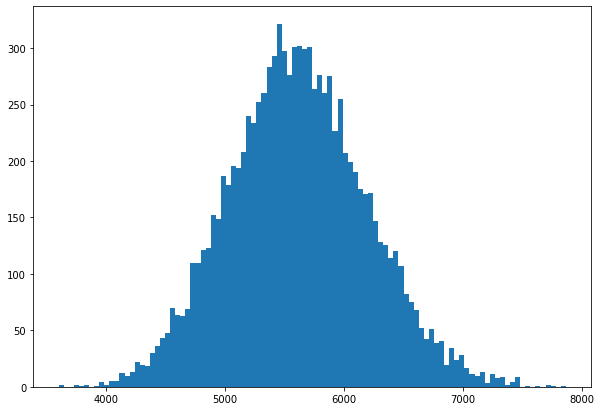

In [332]:
plt.hist(v_mse_iso, bins=100)

(array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   1.,
          0.,   2.,   2.,   1.,   2.,   3.,   5.,   5.,   6.,   5.,   5.,
         12.,   2.,   6.,   3.,  10.,  12.,  11.,  21.,  14.,  24.,  32.,
         30.,  38.,  41.,  44.,  57.,  64.,  59.,  69.,  78.,  93.,  97.,
         89.,  98., 157., 138., 172., 207., 198., 233., 216., 218., 262.,
        247., 309., 315., 322., 366., 355., 381., 382., 408., 382., 329.,
        396., 377., 354., 309., 328., 268., 254., 223., 177., 149., 126.,
         95.,  98.,  64.,  54.,  32.,  22.,  12.,   9.,   4.,   3.,   1.,
          2.]),
 array([-0.26218089, -0.25790866, -0.25363642, -0.24936419, -0.24509195,
        -0.24081972, -0.23654748, -0.23227525, -0.22800301, -0.22373078,
        -0.21945854, -0.21518631, -0.21091407, -0.20664184, -0.2023696 ,
        -0.19809737, -0.19382513, -0.1895529 , -0.18528066, -0.18100843,
        -0.17673619, -0.17

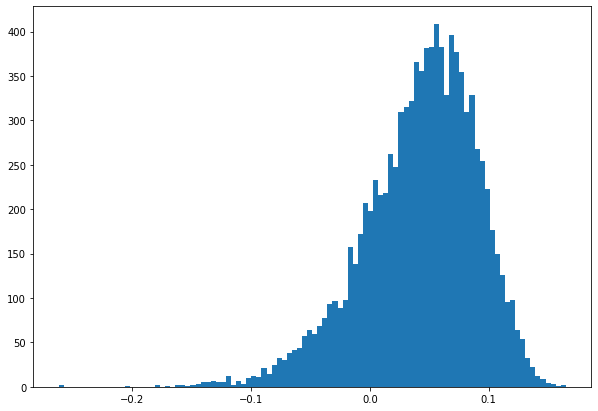

In [333]:
plt.hist(v_r2_iso, bins=100)

#### TSNE

In [334]:
v_mse_tsne = []
v_r2_tsne = []
for i in range(0, 10000):
  x_train, x_test, y_train, y_test = train_test_split(diabetes_data_embedded_tsne, diabetes_target, test_size=0.20)
  reg = linear_model.LinearRegression()
  reg.fit(x_train, y_train)
  y_pred_tsne = reg.predict(x_test)
  v_mse_tsne.append(mean_squared_error(y_test, y_pred_tsne))
  v_r2_tsne.append(r2_score(y_test, y_pred_tsne))

print("Max MSE tsne: " + str(max(v_mse_tsne)))
print("Min MSE tsne: " + str(min(v_mse_tsne)))
print("DevPad MSE tsne: " + str(np.sqrt(np.var(v_mse_tsne))))
print("Max R2 tsne: " + str(max(v_r2_tsne)))
print("Min R2 tsne: " + str(min(v_r2_tsne)))
print("DevPad R2 tsne: " + str(np.sqrt(np.var(v_r2_tsne))))

Max MSE tsne: 7648.713961836374
Min MSE tsne: 3104.730075259423
DevPad MSE tsne: 558.0530820916155
Max R2 tsne: 0.2972495554063004
Min R2 tsne: -0.22663529011956118
DevPad R2 tsne: 0.062372176971352916


(array([  1.,   0.,   0.,   1.,   1.,   1.,   1.,   2.,   2.,   3.,   2.,
          4.,   4.,   6.,   8.,   8.,  17.,  20.,  35.,  32.,  44.,  55.,
         67.,  73.,  80.,  82., 103., 114., 167., 155., 162., 176., 219.,
        204., 234., 276., 250., 248., 309., 305., 321., 298., 317., 322.,
        348., 344., 329., 329., 291., 281., 269., 258., 289., 239., 254.,
        229., 198., 172., 161., 128., 143., 134., 106., 103.,  86.,  76.,
         72.,  66.,  45.,  52.,  38.,  40.,  26.,  41.,  15.,  19.,  23.,
         10.,  14.,   8.,   7.,   9.,   4.,   4.,   1.,   0.,   4.,   1.,
          0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,
          1.]),
 array([3104.73007526, 3150.16991413, 3195.60975299, 3241.04959186,
        3286.48943072, 3331.92926959, 3377.36910845, 3422.80894732,
        3468.24878619, 3513.68862505, 3559.12846392, 3604.56830278,
        3650.00814165, 3695.44798051, 3740.88781938, 3786.32765825,
        3831.76749711, 3877.20733598, 3922.647

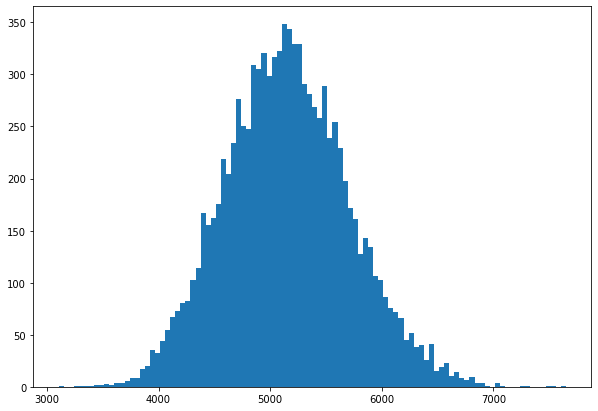

In [335]:
plt.hist(v_mse_tsne, bins=100)

(array([  1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   2.,   1.,   1.,   2.,   0.,   0.,   0.,   1.,   1.,   4.,
          3.,   0.,   5.,   9.,   4.,   2.,   3.,  10.,  11.,   8.,   9.,
         11.,  12.,  22.,  27.,  21.,  24.,  25.,  23.,  41.,  44.,  53.,
         74.,  62.,  80.,  72., 110., 119., 117., 131., 140., 155., 154.,
        182., 189., 244., 217., 244., 268., 271., 297., 306., 328., 309.,
        344., 333., 359., 343., 364., 344., 344., 338., 312., 290., 263.,
        244., 247., 240., 189., 168., 140., 123., 123., 105.,  68.,  60.,
         52.,  38.,  36.,  30.,  21.,  10.,   7.,   7.,   2.,   3.,   0.,
          1.]),
 array([-0.22663529, -0.22139644, -0.21615759, -0.21091874, -0.2056799 ,
        -0.20044105, -0.1952022 , -0.18996335, -0.1847245 , -0.17948565,
        -0.17424681, -0.16900796, -0.16376911, -0.15853026, -0.15329141,
        -0.14805256, -0.14281371, -0.13757487, -0.13233602, -0.12709717,
        -0.12185832, -0.11

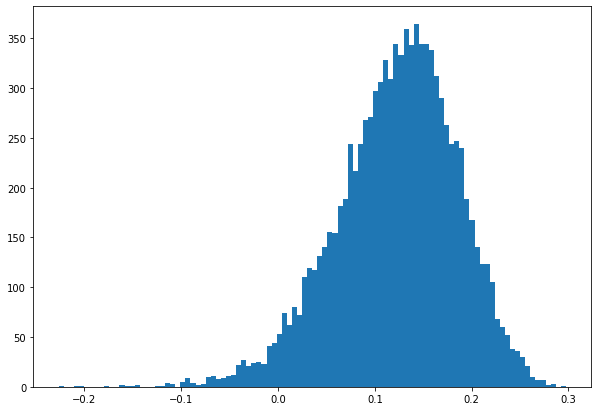

In [336]:
plt.hist(v_r2_tsne, bins=100)

### Comparando modelos de Regressão

Exiba o gráfico de dispersão dos dados de teste e a curva de regressão gerada em cada caso.

#### Least Squares

In [0]:
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_transformed_pca, diabetes_target, test_size=0.20)
lin = LinearRegression()
lin.fit(x_train, y_train)
y_pred = lin.predict(x_test)
lin_test_pca = x_test
lin_pred_pca = y_pred

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_transformed_ica, diabetes_target, test_size=0.20)
lin = LinearRegression()
lin.fit(x_train, y_train)
y_pred = lin.predict(x_test)
lin_test_ica = x_test
lin_pred_ica = y_pred

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_transformed_iso, diabetes_target, test_size=0.20)
lin = LinearRegression()
lin.fit(x_train, y_train)
y_pred = lin.predict(x_test)
lin_test_iso = x_test
lin_pred_iso = y_pred

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_embedded_tsne, diabetes_target, test_size=0.20)
lin = LinearRegression()
lin.fit(x_train, y_train)
y_pred = lin.predict(x_test)
lin_test_tsne = x_test
lin_pred_tsne = y_pred

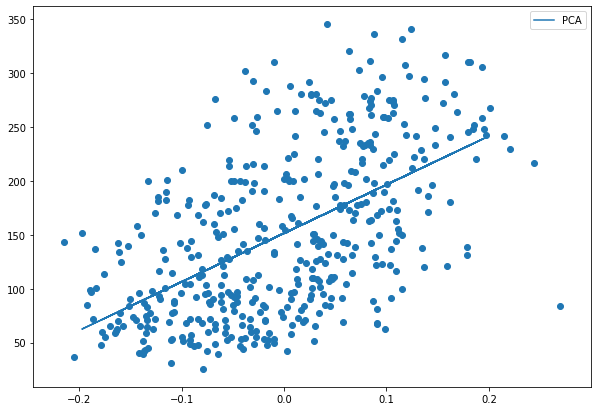

In [338]:
plt.scatter(diabetes_data_transformed_pca, diabetes_target)
plt.plot(lin_test_pca, lin_pred_pca, label="PCA")
plt.legend()

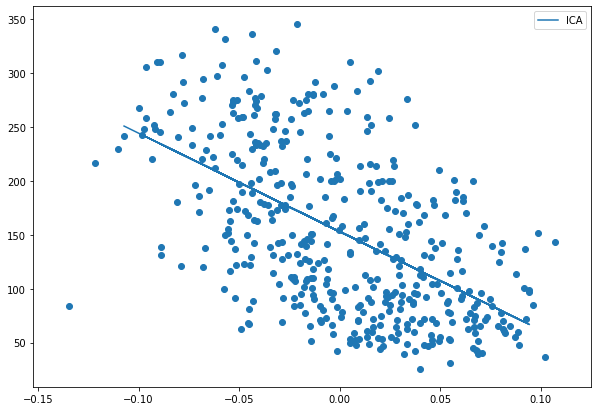

In [339]:
plt.scatter(diabetes_data_transformed_ica, diabetes_target)
plt.plot(lin_test_ica, lin_pred_ica, label="ICA")
plt.legend()

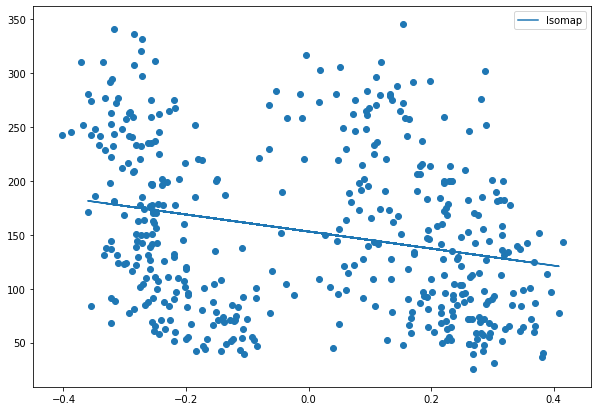

In [340]:
plt.scatter(diabetes_data_transformed_iso, diabetes_target)
plt.plot(lin_test_iso, lin_pred_iso, label="Isomap")
plt.legend()

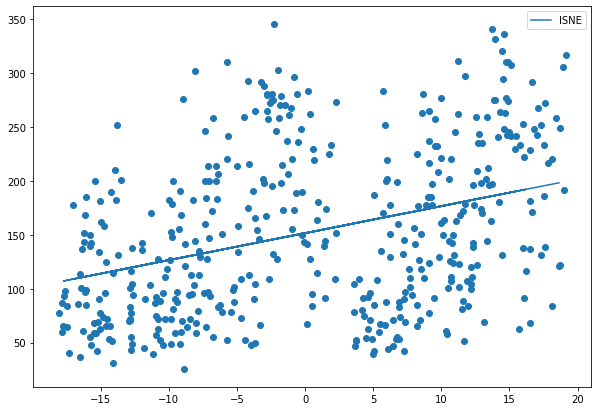

In [341]:
plt.scatter(diabetes_data_embedded_tsne, diabetes_target)
plt.plot(lin_test_tsne, lin_pred_tsne, label="ISNE")
plt.legend()

#### Ridge

In [0]:
from sklearn.linear_model import Ridge

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_transformed_pca, diabetes_target, test_size=0.20)
rid = Ridge(alpha=1.0)
rid.fit(x_train, y_train)
y_pred = rid.predict(x_test)
rid_test_pca = x_test
rid_pred_pca = y_pred

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_transformed_ica, diabetes_target, test_size=0.20)
rid = Ridge(alpha=1.0)
rid.fit(x_train, y_train)
y_pred = rid.predict(x_test)
rid_test_ica = x_test
rid_pred_ica = y_pred

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_transformed_iso, diabetes_target, test_size=0.20)
rid = Ridge(alpha=1.0)
rid.fit(x_train, y_train)
y_pred = rid.predict(x_test)
rid_test_iso = x_test
rid_pred_iso = y_pred

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_embedded_tsne, diabetes_target, test_size=0.20)
rid = Ridge(alpha=1.0)
rid.fit(x_train, y_train)
y_pred = rid.predict(x_test)
rid_test_tsne = x_test
rid_pred_tsne = y_pred

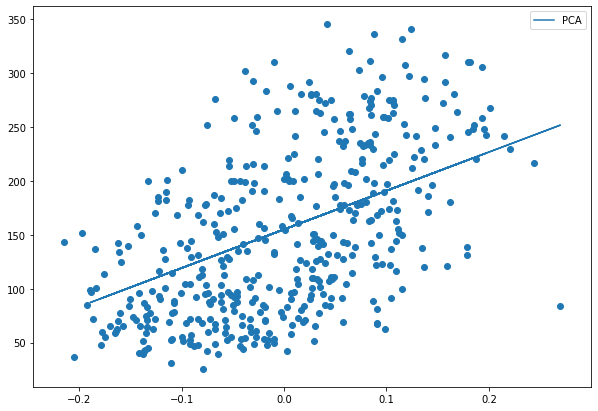

In [343]:
plt.scatter(diabetes_data_transformed_pca, diabetes_target)
plt.plot(rid_test_pca, rid_pred_pca, label="PCA")
plt.legend()

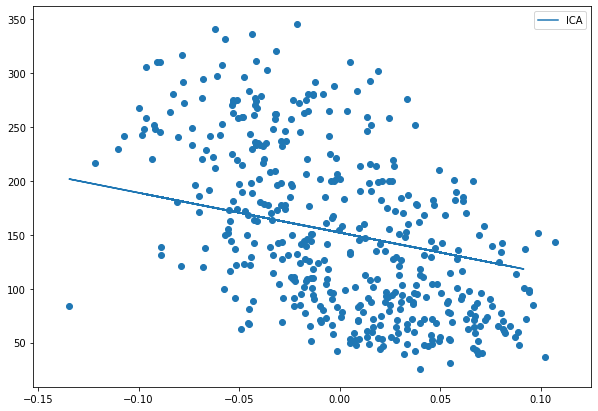

In [344]:
plt.scatter(diabetes_data_transformed_ica, diabetes_target)
plt.plot(rid_test_ica, rid_pred_ica, label="ICA")
plt.legend()

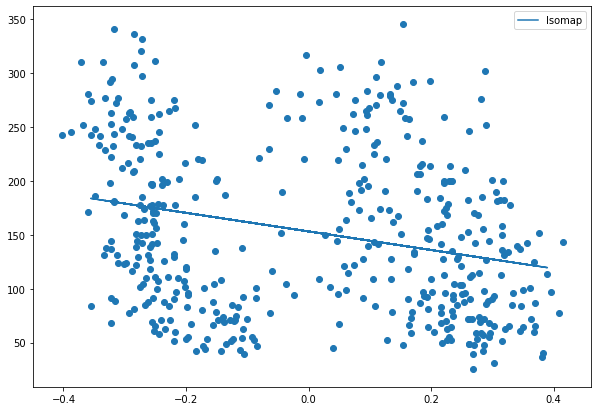

In [345]:
plt.scatter(diabetes_data_transformed_iso, diabetes_target)
plt.plot(rid_test_iso, rid_pred_iso, label="Isomap")
plt.legend()

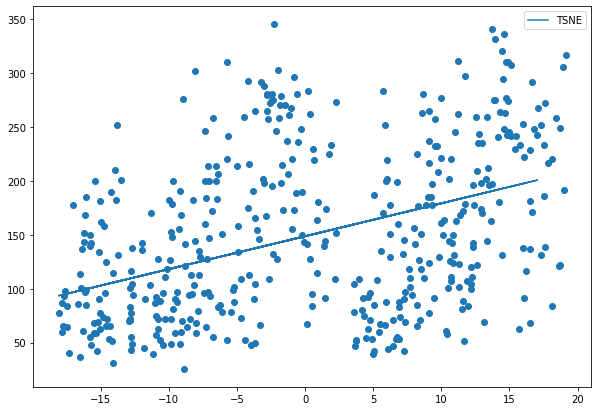

In [346]:
plt.scatter(diabetes_data_embedded_tsne, diabetes_target)
plt.plot(rid_test_tsne, rid_pred_tsne, label="TSNE")
plt.legend()

#### Lasso

In [0]:
from sklearn.linear_model import Lasso

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_transformed_pca, diabetes_target, test_size=0.20)
las = Lasso(alpha=1.0)
las.fit(x_train, y_train)
y_pred = las.predict(x_test)
las_test_pca = x_test
las_pred_pca = y_pred

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_transformed_ica, diabetes_target, test_size=0.20)
las = Lasso(alpha=1.0)
las.fit(x_train, y_train)
y_pred = las.predict(x_test)
las_test_ica = x_test
las_pred_ica = y_pred

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_transformed_iso, diabetes_target, test_size=0.20)
las = Lasso(alpha=1.0)
las.fit(x_train, y_train)
y_pred = las.predict(x_test)
las_test_iso = x_test
las_pred_iso = y_pred

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_embedded_tsne, diabetes_target, test_size=0.20)
las = Lasso(alpha=1.0)
las.fit(x_train, y_train)
y_pred = las.predict(x_test)
las_test_tsne = x_test
las_pred_tsne = y_pred

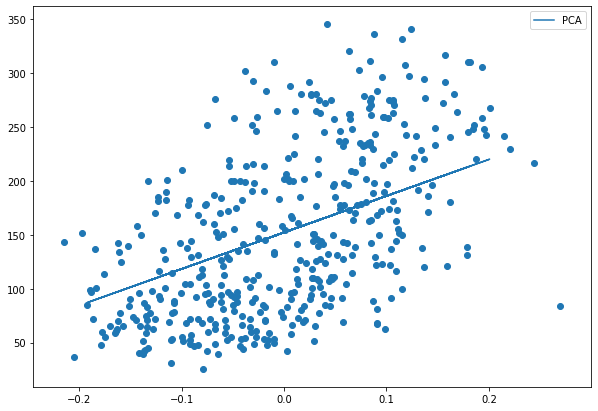

In [348]:
plt.scatter(diabetes_data_transformed_pca, diabetes_target)
plt.plot(las_test_pca, las_pred_pca, label="PCA")
plt.legend()

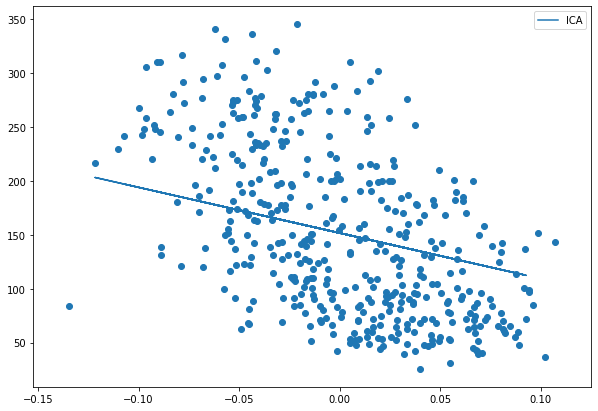

In [349]:
plt.scatter(diabetes_data_transformed_ica, diabetes_target)
plt.plot(las_test_ica, las_pred_ica, label="ICA")
plt.legend()

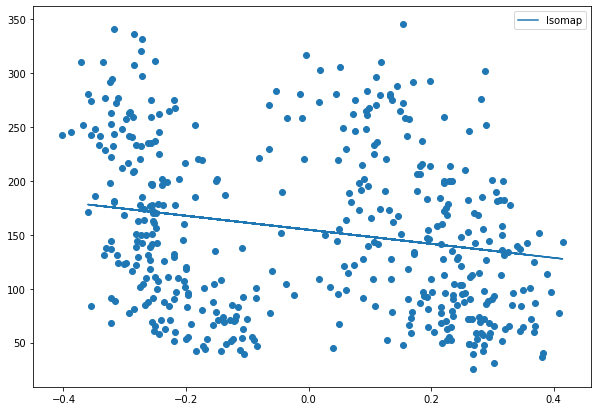

In [350]:
plt.scatter(diabetes_data_transformed_iso, diabetes_target)
plt.plot(las_test_iso, las_pred_iso, label="Isomap")
plt.legend()

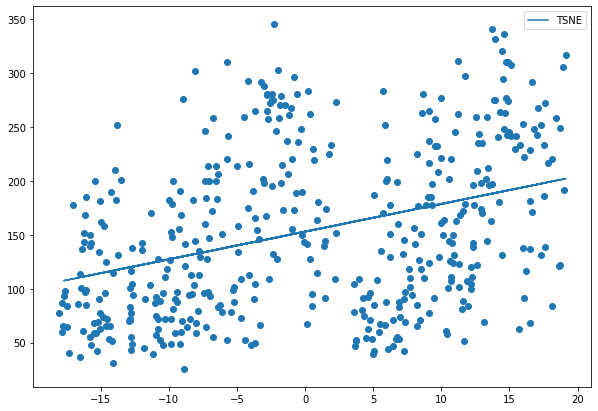

In [351]:
plt.scatter(diabetes_data_embedded_tsne, diabetes_target)
plt.plot(las_test_tsne, las_pred_tsne, label="TSNE")
plt.legend()

#### Lasso LARS

In [0]:
from sklearn.linear_model import LassoLars

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_transformed_pca, diabetes_target, test_size=0.20)
lassolars = LassoLars(alpha=0.01)
lassolars.fit(x_train, y_train)
y_pred = lassolars.predict(x_test)
lassolars_test_pca = x_test
lassolars_pred_pca = y_pred

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_transformed_ica, diabetes_target, test_size=0.20)
lassolars = LassoLars(alpha=0.01)
lassolars.fit(x_train, y_train)
y_pred = lassolars.predict(x_test)
lassolars_test_ica = x_test
lassolars_pred_ica = y_pred

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_transformed_iso, diabetes_target, test_size=0.20)
lassolars = LassoLars(alpha=0.01)
lassolars.fit(x_train, y_train)
y_pred = lassolars.predict(x_test)
lassolars_test_iso = x_test
lassolars_pred_iso = y_pred

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_embedded_tsne, diabetes_target, test_size=0.20)
lassolars = LassoLars(alpha=0.01)
lassolars.fit(x_train, y_train)
y_pred = lassolars.predict(x_test)
lassolars_test_tsne = x_test
lassolars_pred_tsne = y_pred

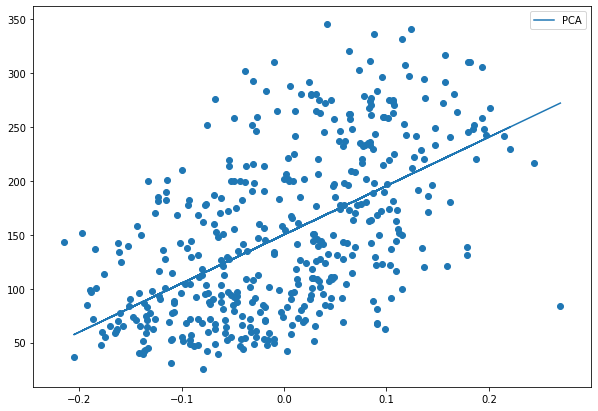

In [353]:
plt.scatter(diabetes_data_transformed_pca, diabetes_target)
plt.plot(lassolars_test_pca, lassolars_pred_pca, label="PCA")
plt.legend()

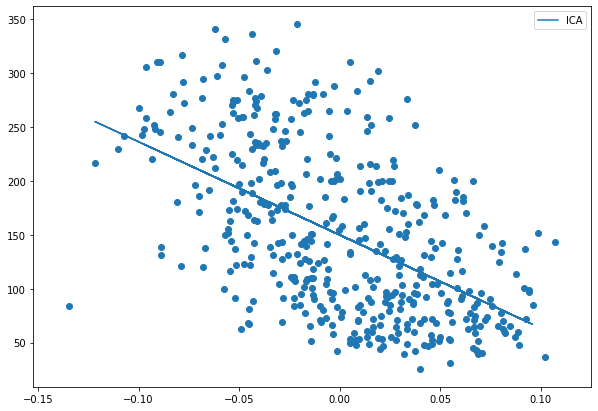

In [354]:
plt.scatter(diabetes_data_transformed_ica, diabetes_target)
plt.plot(lassolars_test_ica, lassolars_pred_ica, label="ICA")
plt.legend()

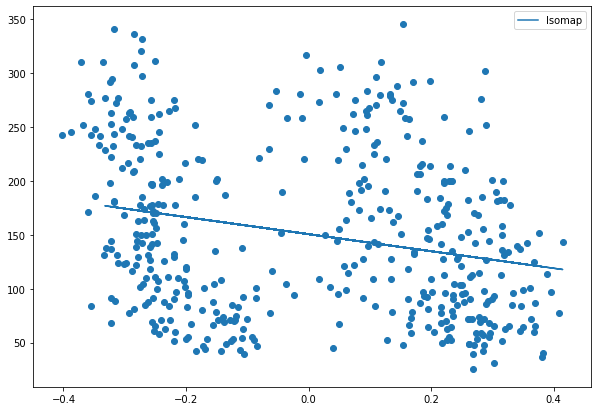

In [355]:
plt.scatter(diabetes_data_transformed_iso, diabetes_target)
plt.plot(lassolars_test_iso, lassolars_pred_iso, label="Isomap")
plt.legend()

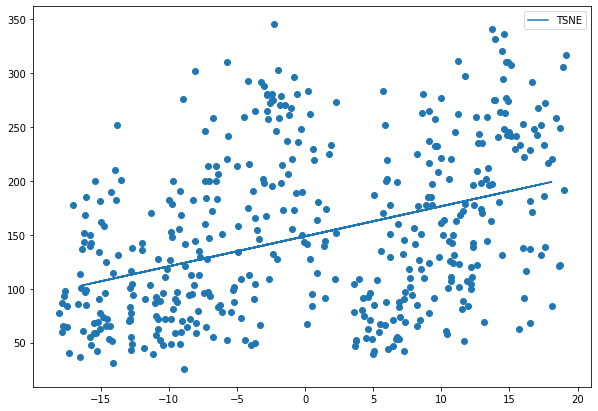

In [356]:
plt.scatter(diabetes_data_embedded_tsne, diabetes_target)
plt.plot(lassolars_test_tsne, lassolars_pred_tsne, label="TSNE")
plt.legend()

#### Bayesian Ridge

In [0]:
from sklearn.linear_model import BayesianRidge

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_transformed_pca, diabetes_target, test_size=0.20)
bay = BayesianRidge()
bay.fit(x_train, y_train)
y_pred = bay.predict(x_test)
bay_test_pca = x_test
bay_pred_pca = y_pred

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_transformed_ica, diabetes_target, test_size=0.20)
bay = BayesianRidge()
bay.fit(x_train, y_train)
y_pred = bay.predict(x_test)
bay_test_ica = x_test
bay_pred_ica = y_pred

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_transformed_iso, diabetes_target, test_size=0.20)
bay = BayesianRidge()
bay.fit(x_train, y_train)
y_pred = bay.predict(x_test)
bay_test_iso = x_test
bay_pred_iso = y_pred

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_embedded_tsne, diabetes_target, test_size=0.20)
bay = BayesianRidge()
bay.fit(x_train, y_train)
y_pred = bay.predict(x_test)
bay_test_tsne = x_test
bay_pred_tsne = y_pred

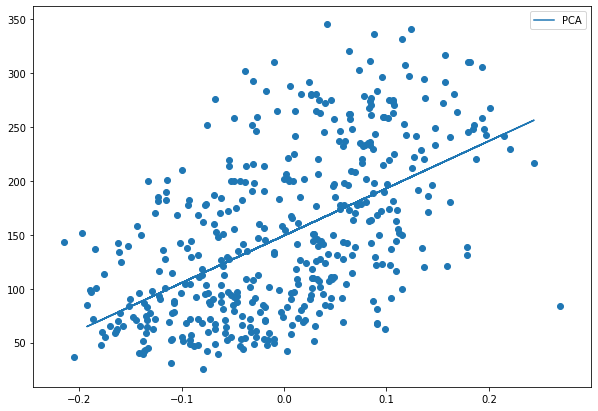

In [358]:
plt.scatter(diabetes_data_transformed_pca, diabetes_target)
plt.plot(bay_test_pca, bay_pred_pca, label="PCA")
plt.legend()

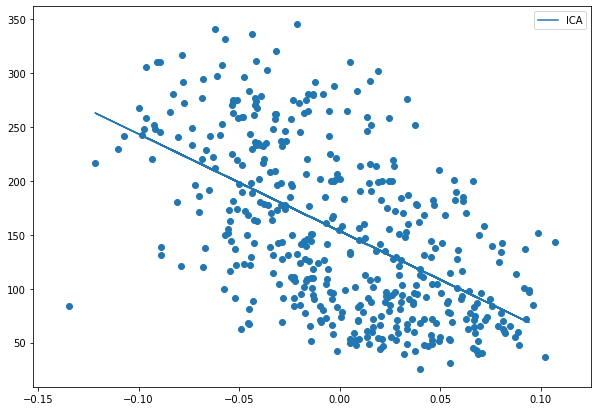

In [359]:
plt.scatter(diabetes_data_transformed_ica, diabetes_target)
plt.plot(bay_test_ica, bay_pred_ica, label="ICA")
plt.legend()

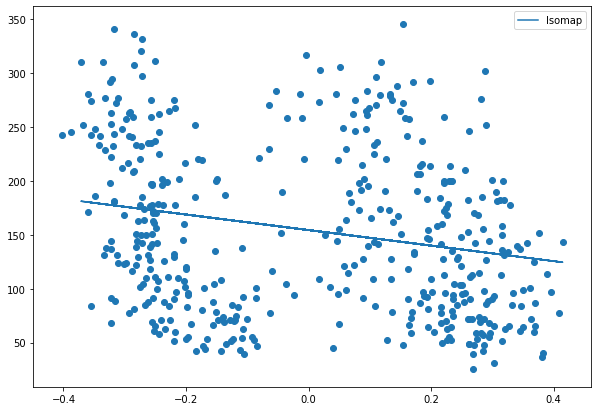

In [360]:
plt.scatter(diabetes_data_transformed_iso, diabetes_target)
plt.plot(bay_test_iso, bay_pred_iso, label="Isomap")
plt.legend()

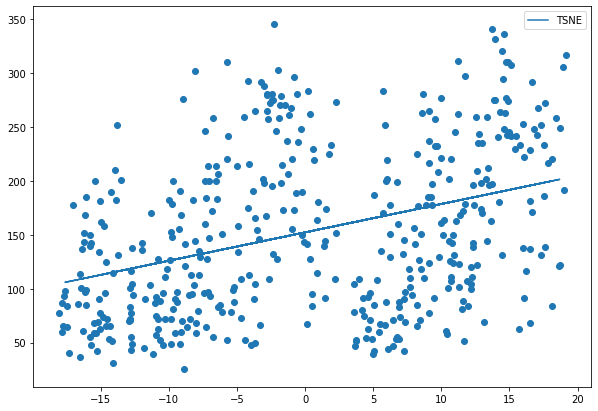

In [361]:
plt.scatter(diabetes_data_embedded_tsne, diabetes_target)
plt.plot(bay_test_tsne, bay_pred_tsne, label="TSNE")
plt.legend()

#### RANSAC

In [0]:
from sklearn.linear_model import RANSACRegressor

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_transformed_pca, diabetes_target, test_size=0.20)
rans = RANSACRegressor()
rans.fit(x_train, y_train)
y_pred = rans.predict(x_test)
rans_test_pca = x_test
rans_pred_pca = y_pred

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_transformed_ica, diabetes_target, test_size=0.20)
rans = RANSACRegressor()
rans.fit(x_train, y_train)
y_pred = rans.predict(x_test)
rans_test_ica = x_test
rans_pred_ica = y_pred

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_transformed_iso, diabetes_target, test_size=0.20)
rans = RANSACRegressor()
rans.fit(x_train, y_train)
y_pred = rans.predict(x_test)
rans_test_iso = x_test
rans_pred_iso = y_pred

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_embedded_tsne, diabetes_target, test_size=0.20)
rans = RANSACRegressor()
rans.fit(x_train, y_train)
y_pred = rans.predict(x_test)
rans_test_tsne = x_test
rans_pred_tsne = y_pred

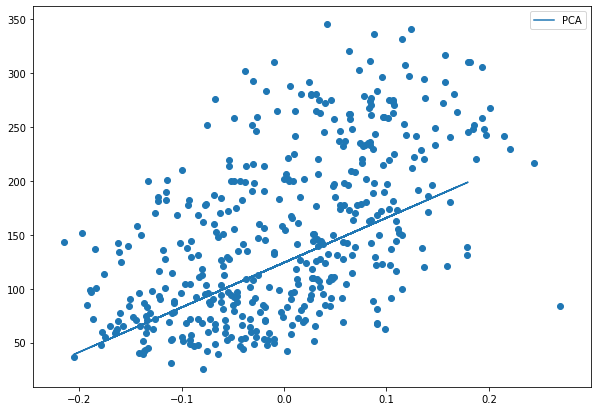

In [363]:
plt.scatter(diabetes_data_transformed_pca, diabetes_target)
plt.plot(rans_test_pca, rans_pred_pca, label="PCA")
plt.legend()

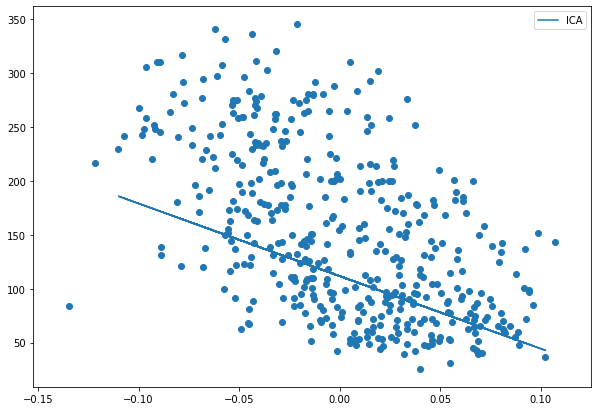

In [364]:
plt.scatter(diabetes_data_transformed_ica, diabetes_target)
plt.plot(rans_test_ica, rans_pred_ica, label="ICA")
plt.legend()

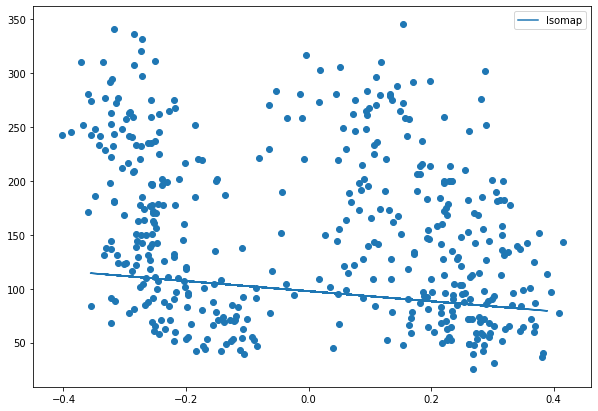

In [365]:
plt.scatter(diabetes_data_transformed_iso, diabetes_target)
plt.plot(rans_test_iso, rans_pred_iso, label="Isomap")
plt.legend()

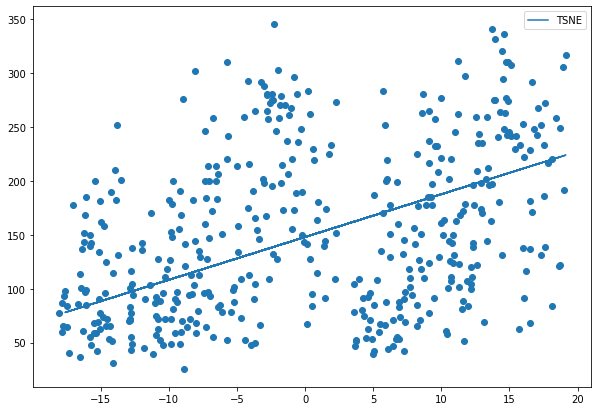

In [366]:
plt.scatter(diabetes_data_embedded_tsne, diabetes_target)
plt.plot(rans_test_tsne, rans_pred_tsne, label="TSNE")
plt.legend()

#### Theil-Sen

In [0]:
from sklearn.linear_model import TheilSenRegressor

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_transformed_pca, diabetes_target, test_size=0.20)
theil = TheilSenRegressor(random_state=0)
theil.fit(x_train, y_train)
y_pred = theil.predict(x_test)
theil_test_pca = x_test
theil_pred_pca = y_pred

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_transformed_ica, diabetes_target, test_size=0.20)
theil = TheilSenRegressor(random_state=0)
theil.fit(x_train, y_train)
y_pred = theil.predict(x_test)
theil_test_ica = x_test
theil_pred_ica = y_pred

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_transformed_iso, diabetes_target, test_size=0.20)
theil = TheilSenRegressor(random_state=0)
theil.fit(x_train, y_train)
y_pred = theil.predict(x_test)
theil_test_iso = x_test
theil_pred_iso = y_pred

x_train, x_test, y_train, y_test = train_test_split(diabetes_data_embedded_tsne, diabetes_target, test_size=0.20)
theil = TheilSenRegressor(random_state=0)
theil.fit(x_train, y_train)
y_pred = theil.predict(x_test)
theil_test_tsne = x_test
theil_pred_tsne = y_pred

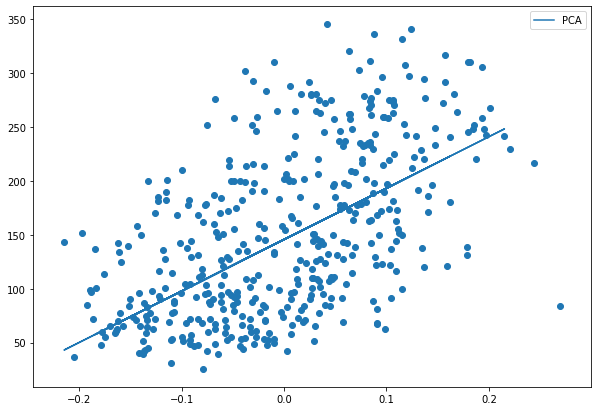

In [368]:
plt.scatter(diabetes_data_transformed_pca, diabetes_target)
plt.plot(theil_test_pca, theil_pred_pca, label="PCA")
plt.legend()

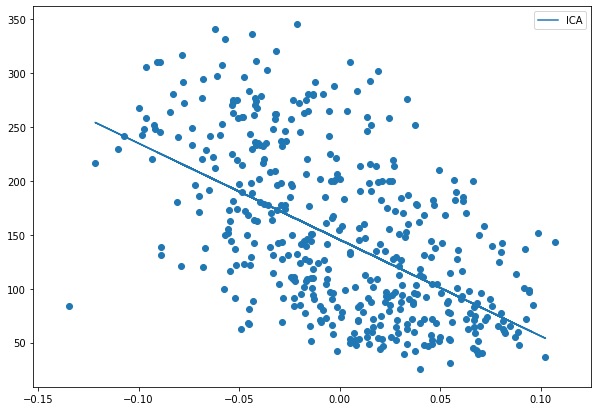

In [369]:
plt.scatter(diabetes_data_transformed_ica, diabetes_target)
plt.plot(theil_test_ica, theil_pred_ica, label="ICA")
plt.legend()

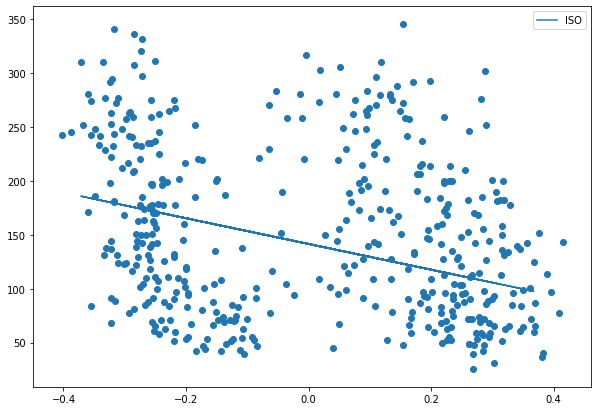

In [370]:
plt.scatter(diabetes_data_transformed_iso, diabetes_target)
plt.plot(theil_test_iso, theil_pred_iso, label="ISO")
plt.legend()

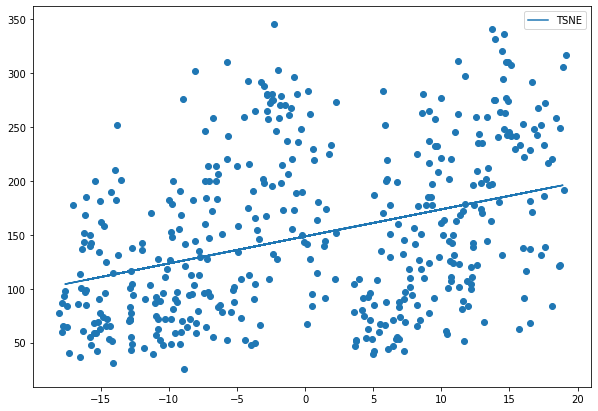

In [371]:
plt.scatter(diabetes_data_embedded_tsne, diabetes_target)
plt.plot(theil_test_tsne, theil_pred_tsne, label="TSNE")
plt.legend()

### Gráfico geral comparativo

Em uma mesma figura, mostre novamente o gráfico de dispersão dos dados e plote cada um dos modelos gerados utilizando cada técnica deste laboratório. Atente-se a fazer com que o gráfico seja suficientemente autoexplicativo, então utilize diferentes cores, insira uma legenda etc.

PCA


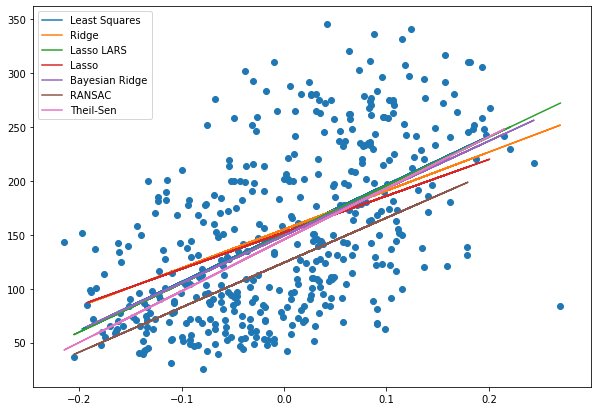

In [372]:
plt.scatter(diabetes_data_transformed_pca, diabetes_target)
print("PCA")
plt.plot(lin_test_pca, lin_pred_pca, label="Least Squares")
plt.plot(rid_test_pca, rid_pred_pca, label="Ridge")
plt.plot(lassolars_test_pca, lassolars_pred_pca, label="Lasso LARS")
plt.plot(las_test_pca, las_pred_pca, label="Lasso")
plt.plot(bay_test_pca, bay_pred_pca, label="Bayesian Ridge")
plt.plot(rans_test_pca, rans_pred_pca, label="RANSAC")
plt.plot(theil_test_pca, theil_pred_pca, label="Theil-Sen")
plt.legend()

ICA


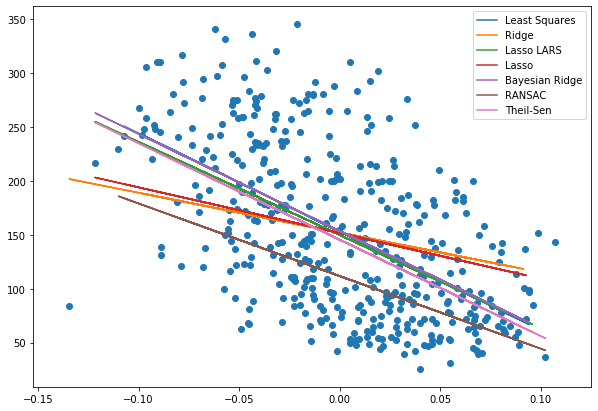

In [373]:
plt.scatter(diabetes_data_transformed_ica, diabetes_target)
print("ICA")
plt.plot(lin_test_ica, lin_pred_ica, label="Least Squares")
plt.plot(rid_test_ica, rid_pred_ica, label="Ridge")
plt.plot(lassolars_test_ica, lassolars_pred_ica, label="Lasso LARS")
plt.plot(las_test_ica, las_pred_ica, label="Lasso")
plt.plot(bay_test_ica, bay_pred_ica, label="Bayesian Ridge")
plt.plot(rans_test_ica, rans_pred_ica, label="RANSAC")
plt.plot(theil_test_ica, theil_pred_ica, label="Theil-Sen")
plt.legend()

ISO


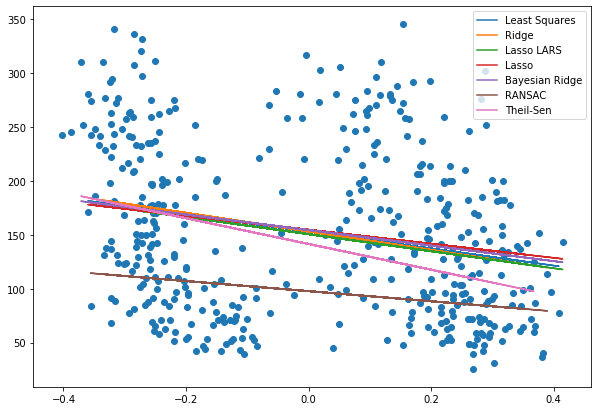

In [374]:
plt.scatter(diabetes_data_transformed_iso, diabetes_target)
print("ISO")
plt.plot(lin_test_iso, lin_pred_iso, label="Least Squares")
plt.plot(rid_test_iso, rid_pred_iso, label="Ridge")
plt.plot(lassolars_test_iso, lassolars_pred_iso, label="Lasso LARS")
plt.plot(las_test_iso, las_pred_iso, label="Lasso")
plt.plot(bay_test_iso, bay_pred_iso, label="Bayesian Ridge")
plt.plot(rans_test_iso, rans_pred_iso, label="RANSAC")
plt.plot(theil_test_iso, theil_pred_iso, label="Theil-Sen")
plt.legend()

TSNE


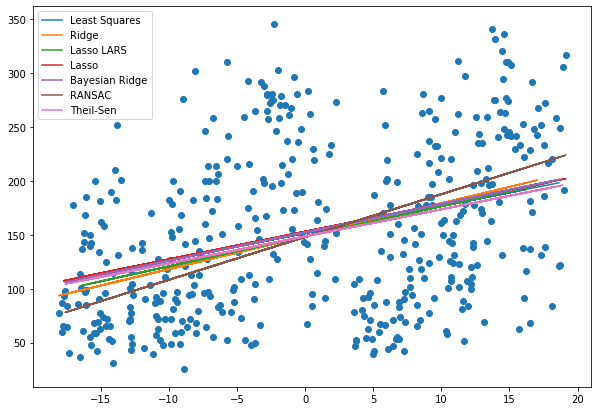

In [375]:
plt.scatter(diabetes_data_embedded_tsne, diabetes_target)
print("TSNE")
plt.plot(lin_test_tsne, lin_pred_tsne, label="Least Squares")
plt.plot(rid_test_tsne, rid_pred_tsne, label="Ridge")
plt.plot(lassolars_test_tsne, lassolars_pred_tsne, label="Lasso LARS")
plt.plot(las_test_tsne, las_pred_tsne, label="Lasso")
plt.plot(bay_test_tsne, bay_pred_tsne, label="Bayesian Ridge")
plt.plot(rans_test_tsne, rans_pred_tsne, label="RANSAC")
plt.plot(theil_test_tsne, theil_pred_tsne, label="Theil-Sen")
plt.legend()